In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torchvision.utils import make_grid

In [2]:
# Check if torch is running on GPU
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU: {}".format(torch.cuda.get_device_name(0)))
else:
    device = torch.device("cpu")


Running on GPU: GeForce MX150


In [3]:
# Get MNIST data
IMAGE_SIZE = 64
mnist_data = datasets.MNIST(
    root='data/mnist/', 
    download=True,
   transform=transforms.Compose([
       transforms.Resize(IMAGE_SIZE),
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
   ])
)
img_channels = 1


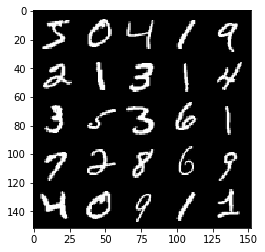

In [4]:
# Look at it!
def show_tensor_imgs(tensor, **kwargs):
    grid = np.transpose(make_grid(tensor, **kwargs).cpu(), (1,2,0))
    plt.imshow(grid)
    
show_tensor_imgs(mnist_data.data[0:25].unsqueeze(1), nrow=5)

In [5]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self, img_channels, init_channels, kernel_size=4, stride=2, padding=1):
        super(Discriminator, self).__init__()
        #TODO: discriminator network
    
    def forward(self, input):
        #TODO: forward
        return input

In [6]:
# Generator Network
class Generator(nn.Module):
    def __init__(self, img_channels, target_channels, init_size, kernel_size=4, stride=2, padding=1):
        super(Generator, self).__init__()
        #TODO: generator network
    def forward(self, input):
        #TODO: forward
        return input


In [7]:
# custom weights initialization called on netG and netD
def weights_init(m):
    #TODO: weight initialization
    pass

In [8]:
init_conv_layers = 64
noise_size = 100

In [9]:
# Create networks and apply weight initializers
disc = Discriminator(img_channels, init_conv_layers).to(device)
disc.apply(weights_init)
print(disc)

gen = Generator(img_channels, init_conv_layers, noise_size).to(device)
gen.apply(weights_init)
print(gen)

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1))
    (12): Sigmoid()
  )
)
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=Fa

In [10]:
loss = nn.BCELoss()

batch_size = 32
lr = 0.0002
example_noise = torch.randn(batch_size, noise_size, 1, 1)
real_label = 1
fake_label = 0

# setup optimizer
optimizer_disc = optim.Adam(disc.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_gen = optim.Adam(gen.parameters(), lr=lr, betas=(0.5, 0.999))

In [ ]:
loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)
for i, data in enumerate(loader):
    #TODO: Errors and optimization steps
    
    ####### Discriminator error ######
    disc.zero_grad()
    
    # Get batch data
   
    # Real data error
    
    # Generate fake data
    
    # Fake data error
    
    # Optimization step
   
    ###### Generator error ######
    gen.zero_grad()
    
    # Generator error (labels are opposite of discriminator labels)
   
    if i % 100 == 0:
        #TODO: print losses
        pass 
    
    if i % 500 == 0:
        #TODO: show generator examples
        pass
   

In [ ]:
show_tensor_imgs(gen(noise).detach(), normalize=True)